# Understanding the Objective
The goal is to predict the duration of placed in a job after entering a course based on experience, education & etc.

## Import dataset

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise.xlsx


# `Import Libreries`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Read the data

In [4]:
df = pd.read_excel('Data_Pathrise.xlsx')

# Data Understanding

In [5]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [7]:
df.isnull().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

A quick analysis of this data it appears to me:

1. Some elements of the columns could have been categorized.
2. Some rows with missing values need to be removed.
3. No need for some columns.



# Clean Data
1. Removing columns "program_duration_days" and "gender" in the beginning beacause have a lots of missing values.  
2. Eliminating missing values in the dataset
3. Some columns can be categorized, such as "employed_status", "length_of_job_search", ...
4. "Id", "pathrise_status", "cohort_tag", "biggest_challenge_in_search" should not matter much

In [8]:
# Remove columns "program_duration_days"
df = df.drop(['program_duration_days', 'gender'], axis=1)

In [9]:
df.isnull().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
race                            18
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   placed                       2544 non-null   int64  
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  race              

In [11]:
# Remove missing values
df = df.dropna(axis=0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1594 entries, 0 to 2543
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1594 non-null   int64  
 1   pathrise_status              1594 non-null   object 
 2   primary_track                1594 non-null   object 
 3   cohort_tag                   1594 non-null   object 
 4   placed                       1594 non-null   int64  
 5   employment_status            1594 non-null   object 
 6   highest_level_of_education   1594 non-null   object 
 7   length_of_job_search         1594 non-null   object 
 8   biggest_challenge_in_search  1594 non-null   object 
 9   professional_experience      1594 non-null   object 
 10  work_authorization_status    1594 non-null   object 
 11  number_of_interviews         1594 non-null   float64
 12  number_of_applications       1594 non-null   int64  
 13  race                   

In [13]:
# Categorizing "employment_status"
def title_organizer(x):
        if ('Employed Full-Time' in x) or ('Employed Part-Time' in x) or ('Contractor' in x) :
            return 'employed'
        elif ('Student' in x) or ('Unemployed' in x) :
            return 'unemployed'

In [14]:
df['employment_status'] = df['employment_status '].apply(title_organizer)

In [15]:
# Categorizing professional_experience"
def title_organizer2(x):
        if ('Less than one year' in x) or ('1-2 years' in x) :
            return 'less than 2 years'
        elif ('3-4 years' in x) :
            return 'less than 4 years'
        elif ('5+ years' in x) :
            return 'over 5 years'

In [16]:
df['professional_experience'] = df['professional_experience'].apply(title_organizer2)

In [17]:
# Categorizing "work_authorization_status"
def title_organizer3(x):
        if ('F1 Visa/OPT' in x) or ('F1 Visa/CPT' in x) or ('STEM OPT' in x) :
            return 'ُstudent_visa'
        elif ('Citizen' in x) or ('Green Card' in x) :
            return 'citizen'
        elif ('Canada Citizen' in x) or ('H1B') :
            return 'work_permit'
        else:
            return 'other'

In [18]:
df['work_authorization_status'] = df['work_authorization_status'].apply(title_organizer3)

In [19]:
# Categorizing "number_of_applications"
def title_organizer4(x):
    if x<=100 :
       return ('less than 100')
    elif x<=200 :
       return ('less than 200')
    else:
       return ('other')

In [20]:
df['number_of_applications'] = df['number_of_applications'].apply(title_organizer4)

In [21]:
df.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag', 'placed',
       'employment_status ', 'highest_level_of_education',
       'length_of_job_search', 'biggest_challenge_in_search',
       'professional_experience', 'work_authorization_status',
       'number_of_interviews', 'number_of_applications', 'race',
       'employment_status'],
      dtype='object')

In [22]:
# Remove columns no need more
cleaned_df = df.drop(['id', 'pathrise_status', 'cohort_tag', 'employment_status ', 'biggest_challenge_in_search'], axis=1)

In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1594 entries, 0 to 2543
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   primary_track               1594 non-null   object 
 1   placed                      1594 non-null   int64  
 2   highest_level_of_education  1594 non-null   object 
 3   length_of_job_search        1594 non-null   object 
 4   professional_experience     1594 non-null   object 
 5   work_authorization_status   1594 non-null   object 
 6   number_of_interviews        1594 non-null   float64
 7   number_of_applications      1594 non-null   object 
 8   race                        1594 non-null   object 
 9   employment_status           1594 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 137.0+ KB


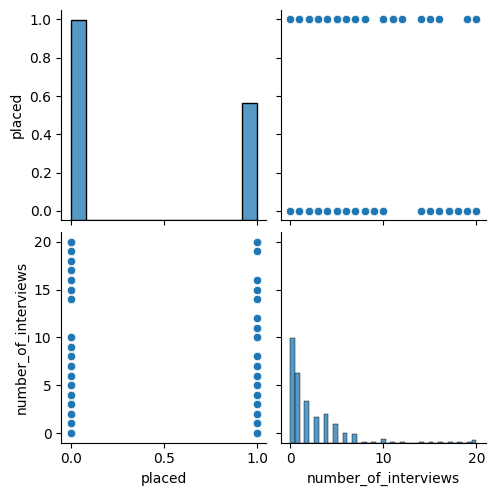

In [24]:
sns.pairplot(cleaned_df)

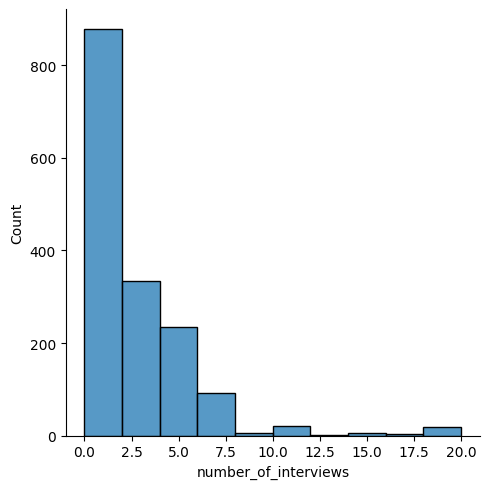

In [25]:
sns.displot(x = 'number_of_interviews', data= cleaned_df, bins = 10 )

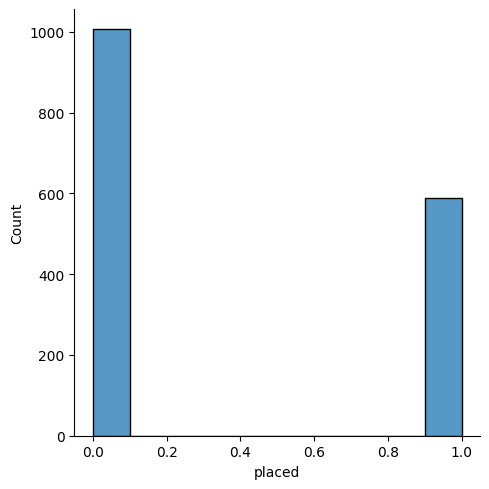

In [26]:
sns.displot(x = 'placed', data= cleaned_df, bins = 10 )

# Feature Engineering

In [27]:
cleaned_df.columns

Index(['primary_track', 'placed', 'highest_level_of_education',
       'length_of_job_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'race', 'employment_status'],
      dtype='object')

In [28]:
preprocessed_df = pd.get_dummies(cleaned_df, ['primary_track', 'highest_level_of_education',
       'length_of_job_search',
       'professional_experience', 'work_authorization_status',
        'number_of_applications', 'race',
       'employment_status'])

In [29]:
preprocessed_df

,placed,number_of_interviews,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,...,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,employment_status_employed,employment_status_unemployed
0,0,2.0,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0,6.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0.0,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0,5.0,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,1,10.0,False,False,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,1,0.0,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2538,0,1.0,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2539,0,4.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2541,0,1.0,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [30]:
x = preprocessed_df.drop(columns=['placed'])

In [31]:
y = preprocessed_df['placed']

# Modeling

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 101)

# Logistic Regression classification algorithm

In [33]:
logreg = LogisticRegression()

In [34]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
prediction = logreg.predict(x_test)

In [36]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [37]:
y_test

2004    1
1401    0
2284    0
661     1
1324    0
       ..
42      0
1084    0
934     0
168     0
1527    1
Name: placed, Length: 479, dtype: int64

In [38]:
confusion_matrix(y_test,prediction)

array([[284,  35],
       [132,  28]])

In [39]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       319
           1       0.44      0.17      0.25       160

    accuracy                           0.65       479
   macro avg       0.56      0.53      0.51       479
weighted avg       0.60      0.65      0.60       479



In [40]:
accuracy_score(y_test, prediction)

0.651356993736952

# K Neighbors classification algorithm




In [41]:
knn = KNeighborsClassifier()

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
prediction_knn = knn.predict(x_test)

In [44]:
prediction_knn

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [45]:
y_test

2004    1
1401    0
2284    0
661     1
1324    0
       ..
42      0
1084    0
934     0
168     0
1527    1
Name: placed, Length: 479, dtype: int64

In [46]:
confusion_matrix(y_test, prediction_knn)

array([[218, 101],
       [113,  47]])

In [47]:
accuracy_score(y_test, prediction_knn)

0.5532359081419624

In [48]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       319
           1       0.32      0.29      0.31       160

    accuracy                           0.55       479
   macro avg       0.49      0.49      0.49       479
weighted avg       0.54      0.55      0.55       479



# Decision Tree classification algorithm



In [49]:
tree = DecisionTreeClassifier()

In [50]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
prediction_tree = tree.predict(x_test)

In [52]:
prediction_tree

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

In [53]:
y_test

2004    1
1401    0
2284    0
661     1
1324    0
       ..
42      0
1084    0
934     0
168     0
1527    1
Name: placed, Length: 479, dtype: int64

In [54]:
confusion_matrix(y_test, prediction_tree)

array([[213, 106],
       [ 95,  65]])

In [55]:
accuracy_score(y_test, prediction_tree)

0.5803757828810021

In [56]:
print(classification_report(y_test, prediction_tree))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       319
           1       0.38      0.41      0.39       160

    accuracy                           0.58       479
   macro avg       0.54      0.54      0.54       479
weighted avg       0.59      0.58      0.58       479



# Random Forest classification algorithm





In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
prediction_rf = rf.predict(x_test)

In [60]:
prediction_rf

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [61]:
y_test

2004    1
1401    0
2284    0
661     1
1324    0
       ..
42      0
1084    0
934     0
168     0
1527    1
Name: placed, Length: 479, dtype: int64

In [62]:
confusion_matrix(y_test, prediction_rf)

array([[226,  93],
       [111,  49]])

In [63]:
accuracy_score(y_test, prediction_rf)

0.5741127348643006

In [64]:
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       319
           1       0.35      0.31      0.32       160

    accuracy                           0.57       479
   macro avg       0.51      0.51      0.51       479
weighted avg       0.56      0.57      0.57       479

